# Simple Linear Regression

## Least Squares Method $^{2.4}$

### Using statsmodels

We are interested in the values of $ \hat{\beta}_{0} $ and $ \hat{\beta}_{1} $ for the **Advertising** data. By means of the **Python**-function **OLS()**, we can easily determine those values:

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Linear Regression using statsmodels.api
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Now we can print a summary, 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        20:10:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

The coefficients are listed under **(coef)**. Here **const** corresponds to $ \hat{\beta}_{0} $, thus to the intercept with the $ y $-axis, and the **TV** corresponds to the slope of the regression line, thus to $ \hat{\beta}_{1} $.

###  Using sklearn

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[x[i]] for i in range(len(x))]

# Linear Regression using sklearn
linreg = LinearRegression()
linreg.fit(x, y)

print('Coefficients: \n', np.round(linreg.coef_, 4),
      '\nIntercept: \n', np.round(linreg.intercept_, 4))

Coefficients: 
 [0.0475] 
Intercept: 
 7.0326


Our regression model then is given by
\begin{equation*}
Y
\approx 7.03+0.0475X
\end{equation*}
According to this approximation, an additional CHF 1000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product. 


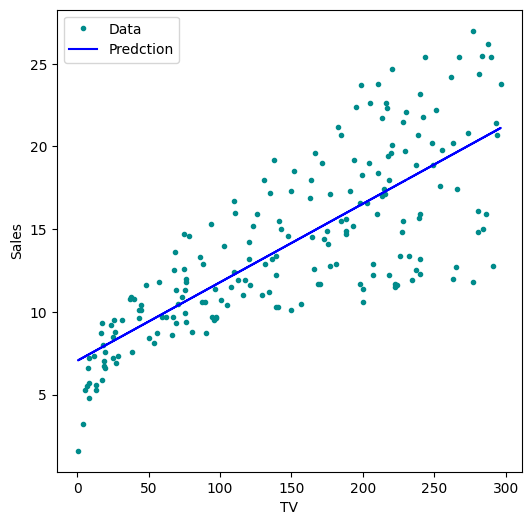

In [4]:
import matplotlib.pyplot as plt

# Predicted y
y_pred = model.predict(x_sm)

# Create figure and plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(df['TV'], y, marker='o', linestyle='None', 
         color='darkcyan', markersize='3', label="Data")
plt.plot(df['TV'], y_pred, 'b-', label="Predction")
# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

1. The **Python**-function **statsmodels.api.OLS()** uses Ordinary Least Squares to fit the *linear model*.
1. Be aware of the (default) order of the function parameters **x** and **y** in **sm.OLS(y, x)**.
1. If **x** is a one-dimensional vector, it needs to be preprocessed using **sm.add\_constant(x)**.

In [5]:
np.sqrt(model.mse_resid)

3.258656368650462

## Standard Error  $^{3.1}$

In this example we assume that we know the *true* relationship between 
$X$ and $Y$, which is 
\begin{equation}
f(X) =2+3X 
\end{equation}

However, in practice we will never observe this perfect relationship, but 
\begin{equation}
Y=f(X)+\epsilon =2+3X +\epsilon
\end{equation}

We call $f(X)=2+3x$ the *population regression line*, which is the best linear approximation to the true relationship between $X$ and $Y$. If we now observe realizations of $X$ and $Y$, we can determine the *least squares line*
\begin{equation*}
Y=\beta_0 + \beta_1 X + \epsilon
\end{equation*}

by estimating $\beta_0$ and $\beta_1$ according to the equation. 

Let us simulate the observed data $X$ and $Y$  from the model
\begin{equation*}
Y=2+3X+\epsilon
\end{equation*}

where $ \epsilon $ is normally distributed with mean 0, thus $ \epsilon\sim\mathcal{N}(0,\sigma^{2}) $. We create 100 random values of $ X $, and generate 100 corresponding values of $Y$ from the model $Y=2+3X+\epsilon$

In [6]:
import numpy as np

n = 100  # number of datapoints

# crate data around y=ax+b
a, b = 3, 2
x = np.sort(np.random.uniform(low=-2, high=2, size=(n)))

y = b + a*x + np.random.normal(loc=0.0, scale=4, size=n)


x_true = np.linspace(-2, 2, n)
y_true = b + a*x_true

We can now plot a number of randomly generated datapoints and the found regression line. 

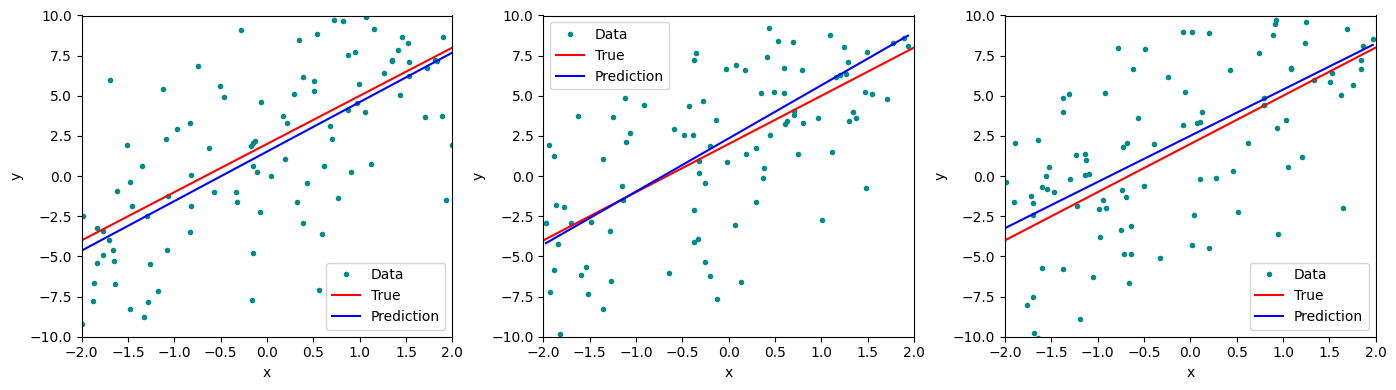

In [7]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create figure and plot
fig = plt.figure(figsize=(14, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    
    # Random data along known function:
    x = np.sort(np.random.uniform(low=-2, high=2, size=n))
    x_sm = sm.add_constant(x)
    y = 2 + 3*x + np.random.normal(loc=0.0, scale=4, size=n)
    # Linear Regression and prediction:
    model = sm.OLS(y, x_sm).fit()
    y_pred = model.predict(x_sm)
    
    # Data points:
    plt.plot(x, y, marker='o', linestyle='None', 
             color='darkcyan', markersize='3', label="Data")
    # True line:
    plt.plot(x_true, y_true, 'r-', label="True")
    # Predicted line:
    plt.plot(x, y_pred, 'b-', label="Prediction")

    # Set labels and Legend
    ax.set_xlabel('x'), ax.set_ylabel('y')
    ax.set_xlim(-2, 2), ax.set_ylim(-10, 10)
    plt.legend()

plt.tight_layout()
plt.show()

The red line represents the plot of the function  $ f(X)=2+3X $, which remains identical in all three simulations. The blue line is the least squares line that was constructed by means of the least squares estimates for the simulated data.  Each least squares line is different, but on average, the least squares lines are quite close to the population regression line.

In the next figure we have generated ten different data sets from the model given by $Y  = 2+3X +\epsilon$ and plotted the corresponding ten least squares lines. Notice that different data sets generated from the same true model result in slightly different least squares lines, but the unobserved population regression line does not change. 

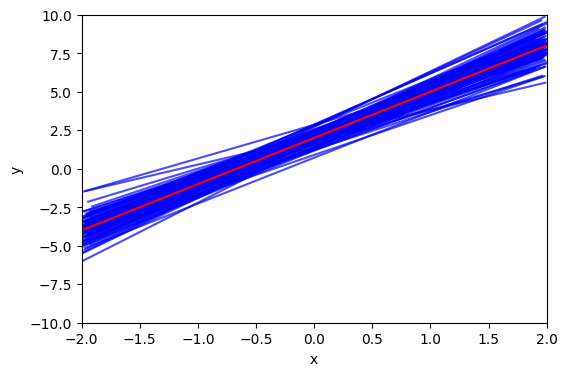

In [8]:
n_lines = 100 # number of iterations

# Create figure and plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)

for i in range(n_lines):
    # Random data allong known function:
    x = np.sort(np.random.uniform(low=-2, high=2, size=n))
    x_sm = sm.add_constant(x)
    y = 2 + 3*x + np.random.normal(loc=0.0, scale=4, size=n)
    # Linear Regression and prediction:
    model = sm.OLS(y, x_sm).fit()
    y_pred = model.predict(x_sm)

    # Predicted line:
    plt.plot(x, y_pred, 'b-', alpha=0.7)
# True line:
plt.plot(x_true, y_true, 'r-', label="True")
# Set labels and Legend
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim(-2, 2), ax.set_ylim(-10, 10)

plt.show()

## Residual Standard Error $^{3.3}$

For the **Advertising** data we can determine the standard errors of the estimated coefficients with the help of **Python**:

In [9]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Linear Regression using statsmodels.api
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Now we can print a summary, 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        20:10:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In the table under **coef**, the listed values are $\hat{\beta}_{0} $ and $ \hat{\beta}_{1} $. In the column **Std.\,Error** we find the values $ 0.457843 $  and $ 0.002691 $ for the two standard errors $ se (\hat{\beta}_{0}) $ and  $ se (\hat{\beta}_{1}) $. They correspond to the average deviations of the estimated values of $\hat{\beta}_{0} $ and $ \hat{\beta}_{1} $ which are $ 7.0326 $ and $ 0.04754 $.
In the right top part, we find some constants describing the fit, for example **R-squared** which is the portion of variance explained by the fit. 

## t-Test in Linear Regression $^{3.4}$

For the **Advertising** data, we want to compute the p-value of  $\beta_1$  of the least squares model for the regression of number of units sold on TV advertising budget.

The least squares estimate for $\beta_1$ is 0.047537 and the standard error of $\hat{\beta}_1$.

Hence, we find for the realization of the statistic $T$
\begin{equation*}
t
=\dfrac{\hat{\beta}_{1}-0}{se (\hat{\beta}_{1})}
=\dfrac{0.047537-0}{0.002691}
=17.66518
\end{equation*}


Furthermore, we find in the **Python**-output, that the number of degrees of freedom is $198$, which is listed under **Df Residuals**. The number of degrees of freedom is given by  $n-2$, it follows that in total there are $n=200$ data points. This number corresponds to the number of markets in the data set **Advertising**.

Since the coefficient for $\hat{\beta}_1$ is very large relative to its standard error, so the t-statistic is also large. The probability of seeing such a value if $H_{0}$ is true is virtually zero. Hence we can conclude that $\beta_{1}\neq 0$. 

We now will compute the p-value, that is, the probability of observing a value of the t-statistic larger than $|t|=17.66518$. Assuming $\beta_1=0$, $T$ will follow a t-distribution with  $n-2=198$ degrees of freedom. Then the (two-sided) p-value can be determined with the help of **Python**

In [10]:
from scipy.stats import t

p_two_sided = 2 * (1 - t.cdf(17.66518, 198))
print(p_two_sided)

0.0


Since the alternative hypothesis is two-sided, we need to multiply the one-sided p-value by two in order to obtain the two-sided p-value. 
The corresponding  p-value : $0.000$ is listed under **P(>|t|)**. Since it is zero, hence smaller than a siginificance level of $ 0.05 $ , we *reject* the null hypothesis  $\beta_{1}=0$ in favor of the alternative hypothesis $\beta_{1}\neq 0 $. We therefore find that there clearly is a relationship between **TV** and **sales**.

## Confidence Intervals for Regression Coefficients $^{3.5}$

In the case of the **Advertising** data, the 95% confidence interval can be found with the help of the **conf\_int**-function: 

In [11]:
import numpy as np
# Confidence interval found using conf_int method
print(np.round(model.conf_int(alpha=0.05), 4))

            0       1
const  6.1297  7.9355
TV     0.0422  0.0528


The 95%-confidence interval for $\beta_{0}$ thus is
\begin{equation*}
[6.130,7.935]
\end{equation*}
and the 95%-confidence interval for $\beta_{1}$
\begin{equation*}
[0.042,0.053]
\end{equation*}
Therefore, we can conclude that in the absence of any advertising, sales will, on average, fall somewhere between $ 6130 $ and $ 7935 $ units. Furthermore, for each  CHF 1000 increase in television advertising, there will be an average increase in sales of between 42 and 53 units. 

1. The exact formula for the 95% confidence interval for the regression coefficient $\beta_i$ is

\begin{equation*}
\left [
\hat{\beta}_i- t_{0.975;n-2}\cdot se (\hat{\beta}_{i}),\hat{\beta}_{i}+ t_{0.975;n-2}\cdot se (\hat{\beta}_{i})
\right ]
\end{equation*}

where $t_{0.975;n-1}$ is the 97.5% quantile of a t-distribution with  $n-2$ degrees of freedom. 

2. With **Python** we determine the  97.5% quantile of a t-distribution as follows

In [12]:
# the 97.5% quantile of a t-distribution:
q_975 = t.ppf(0.975, 18)
print(np.round(q_975, 4))

2.1009


which is approximately 2.

## Confidence Interval for the True Predicted Value $^{4.2}$
For the **Advertising** data set we determine the 95% confidence intervals for the following values of **TV** : $ 3 $, $ 100 $ and $ 275 $

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Fit Linear Model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

# Prediction at points 3, 100 and 270
x0 = [3, 100, 275]
x0 = sm.add_constant(x0)

predictionsx0 = model.get_prediction(x0)
predictionsx0 = predictionsx0.summary_frame(alpha=0.05)
predictionsx0 = np.round(predictionsx0, 4)
print(predictionsx0)

      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0   7.1752   0.4509         6.2860         8.0644        0.6879       13.6626
1  11.7863   0.2629        11.2678        12.3047        5.3393       18.2333
2  20.1052   0.4143        19.2882        20.9221       13.6273       26.5830


In the **Python**-output, the values 
\begin{equation*}
\hat{y}_{0}
=\hat{\beta}_{0}+\hat{\beta}_{1}x_{0}
\end{equation*} 

can be found under **mean**; they correspond to the $y$-values on the regression line, thus to the predicted response given a predictor value. 
Under **mean ci lower** the lower limits, under **mean ci upper** the upper limits of the corresponding confidence intervals can be found. 

For the value $ x_{0}=100 $ the 95% confidence interval is given by
\begin{equation*}
[11.268,12.305]
\end{equation*}
The expected value of $\hat{y}_0$ given the predictor value $ x_{0}=100 $ is contained in this interval with a probability of  95%. 

We can visualize confidence intervals for the expected response variable given an intervall of predictor values. In the next figure the regression line is plotted in blue. The green curves correspond to the lower and upper limits of the confidence intervals given a $ x_{0} $. The red lines represent the 95% confidence intervals for the values $ x_{0}=3, 100$ and $ 275 $. These intervals contain with a probability of 95% the corresponding expected values of $\hat{y}_{0} $.  

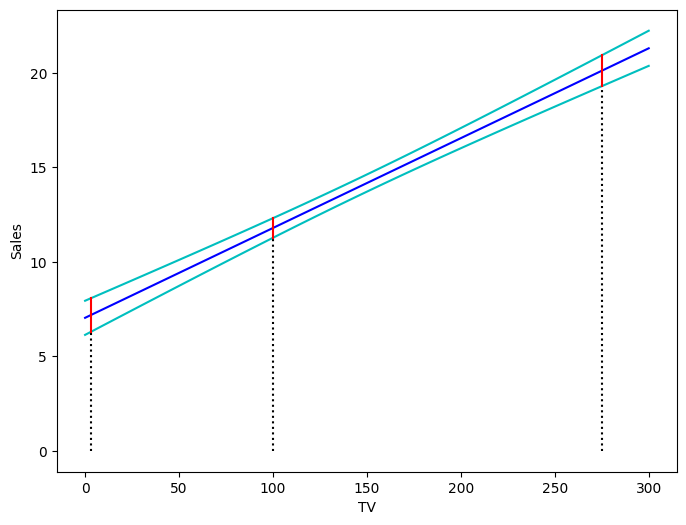

In [14]:
import matplotlib.pyplot as plt

x = np.linspace(0, 300)
x_sm = sm.add_constant(x)

# Predictions
predictionsx = model.get_prediction(x_sm)
# at 95% confidence:
predictionsx = predictionsx.summary_frame(alpha=0.05)

# Create figure and plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
# prediction
plt.plot(x, predictionsx.loc[:,'mean'], 'b-')
# upper and lower boundaries at 95%
plt.plot(x, predictionsx.loc[:,'mean_ci_lower'], 'c-')
plt.plot(x, predictionsx.loc[:,'mean_ci_upper'], 'c-')
# lines of the three points in x0:
for i in range(len(x0)):
    plt.plot([x0[i, 1], x0[i, 1]], 
             [0, predictionsx0.loc[:,'mean_ci_lower'][i]], 'k:' )
    plt.plot([x0[i, 1], x0[i, 1]], 
             [predictionsx0.loc[:,'mean_ci_lower'][i], 
              predictionsx0.loc[:,'mean_ci_upper'][i]], 'r-' )

# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

plt.show()

## Prediction Interval  $^{4.4}$

In the case of the **Advertising** data we determine the 95% prediction intervals for the $x$-values $ 3 $, $ 100 $ and $ 225 $ from the same results as provided in the previous example. 

Under **mean** the predicted $y$-values on the regression line 
\begin{equation*}
\hat{y}_{0}
=\hat{\beta}_{0}+\hat{\beta}_{1}x_{0}
\end{equation*} 
can be found.

**obs ci lower** displays the lower limits and **obs ci upper** the upper limits of the prediction intervals for the given $x$-values.

For the predictor value $ x_{0}=100 $ the 95% prediction interval is given by
\begin{equation*}
[5.339,18.233]
\end{equation*}
A future observation $y_0 $ for given $ x_{0}=100 $ will fall with a probability of 95% into this interval. As we can observe, the prediction interval thus is clearly larger than the confidence interval for the expected value of $\hat{y}_0=\hat{\beta}_0+\hat{\beta}_1 x_{0}$.   

It is again very instructive to visualize the point-wise prediction intervals. The following figure displays the regression line in blue. The green curves represent the upper and lower limits of the prediction intervals for future observations. The red lines correspond to 95% prediction intervals for  $ x_{0}=3, 100 ,275 $. These intervals contain with a probability of  95% the true values of the corresponding future observations $ y_{0} $.

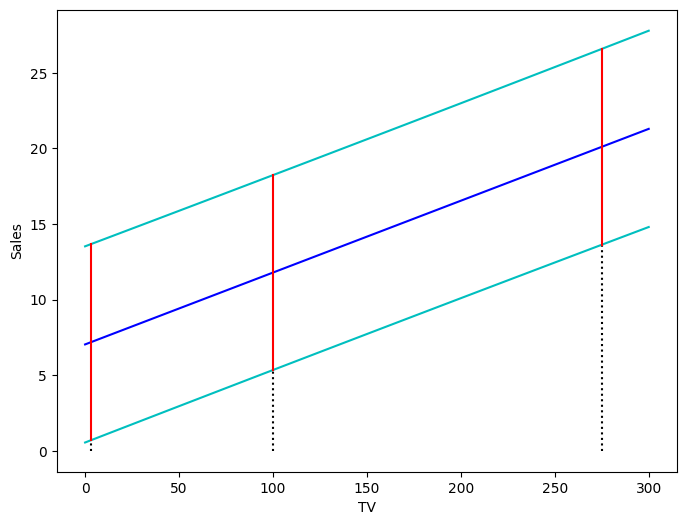

In [15]:
x = np.linspace(0, 300)
x_sm = sm.add_constant(x)

# Predictions
predictionsx = model.get_prediction(x_sm)
# at 95% confidence:
predictionsx = predictionsx.summary_frame(alpha=0.05)

# Create figure and plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
# prediction
plt.plot(x, predictionsx.loc[:,'mean'], 'b-')
# upper and lower boundaries at 95%
plt.plot(x, predictionsx.loc[:,'obs_ci_lower'], 'c-')
plt.plot(x, predictionsx.loc[:,'obs_ci_upper'], 'c-')
# lines of the three points in x0:
for i in range(len(x0)):
    plt.plot([x0[i, 1], x0[i, 1]], 
             [0, predictionsx0.loc[:,'obs_ci_lower'][i]], 'k:' )
    plt.plot([x0[i, 1], x0[i, 1]], 
             [predictionsx0.loc[:,'obs_ci_lower'][i], 
              predictionsx0.loc[:,'obs_ci_upper'][i]], 'r-' )

# Set labels and Legend
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

plt.show()

In [16]:
%pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


## Exercises

### Exercise 1.1

This exercise aims at carrying out a simple regression analysis for the data set constructed by Frank Anscombe.

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
anscombe = pd.read_csv('../data/anscombe.csv')
anscombe.head()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47


In [19]:
x1 = anscombe[['x1']]
y1 = anscombe[['y1']]

x_set = sm.add_constant(x1)

model = sm.OLS(y1, x_set).fit()
print(model.params)
model.summary()

const    3.000091
x1       0.500091
dtype: float64


/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00217
Time:                        20:10:23   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
intercept = model.params.iloc[0]
slope = model.params.iloc[1]

y_pred = x1 * slope + intercept

r = y1 - y_pred # residuals
rss = np.sum(np.square(r), axis = 0) # residual sum of squares
rse = np.sqrt(rss / (r.shape[0] - 2)) # residual standard error = approximation of variance

print(f"Residuals Shape = {r.shape}")
print(f"RSS = {rss}")
print(f"RSE = {rse}")

Residuals Shape = (11, 2)
RSS = x1    0.0
y1    0.0
dtype: float64
RSE = x1    0.0
y1    0.0
dtype: float64


In [21]:
x = anscombe[['x1', 'x2', 'x3', 'x4']]
y = anscombe[['y1', 'y2', 'y3', 'y4']]

results = np.zeros((5, 4))
models = []
for i in range(4):
    xi = x.iloc[:, i]
    yi = y.iloc[:, i]

    x_set = sm.add_constant(xi)
    model = sm.OLS(yi, x_set).fit() # OLS = Ordinary Least Squares
    models.append(model)

    intercept = model.params.iloc[0]
    slope = model.params.iloc[1]
    y_pred = xi * slope + intercept

    r = yi - y_pred # residuals
    rss = np.sum(np.square(r), axis = 0) # residual sum of squares
    rse = np.sqrt(rss / (r.shape[0] - 2)) # residual standard error = approximation of variance

    xi_mean = np.mean(xi)
    xi_dist_sum = np.sum(np.square(xi - xi_mean))

    rse_squared = np.square(rse)
    slope_stderr = np.sqrt(rse_squared / xi_dist_sum)
    intercept_stderr = np.sqrt(rse_squared * (1 / xi.shape[0] + np.square(xi_mean) / xi_dist_sum))

    results[0, i] = intercept
    results[1, i] = slope
    results[2, i] = rse
    results[3, i] = intercept_stderr
    results[4, i] = slope_stderr

results_df = pd.DataFrame(
    results,
    columns=['model1', 'model2', 'model3', 'model4'],
    index=['intercept', 'slope', 'variance', 'intercept std. error', 'slope std. error']
    )

results_df

,model1,model2,model3,model4
intercept,3.000091,3.000909,3.002455,3.001727
slope,0.500091,0.500000,0.499727,0.499909
variance,1.236603,1.237214,1.236311,1.235695
intercept std. error,1.124747,1.125302,1.124481,1.123921
slope std. error,0.117906,0.117964,0.117878,0.117819


In [22]:
for i, model in enumerate(models):
    print(f"\n#################################### Model {i} #################################")
    print(model.summary())


#################################### Model 0 #################################
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00217
Time:                        20:10:23   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)
/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)
/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)
/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)


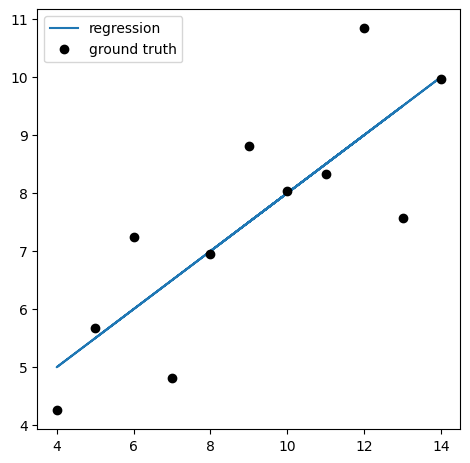

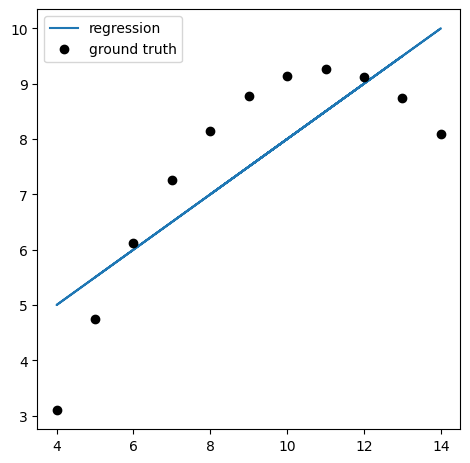

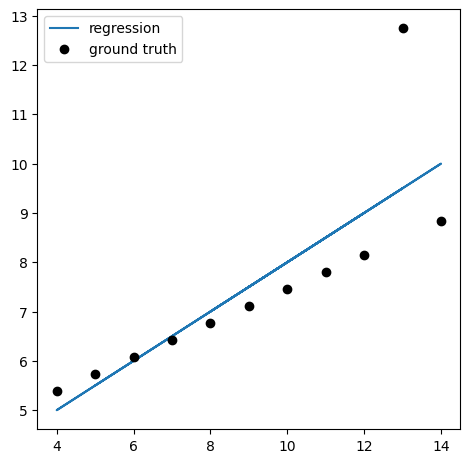

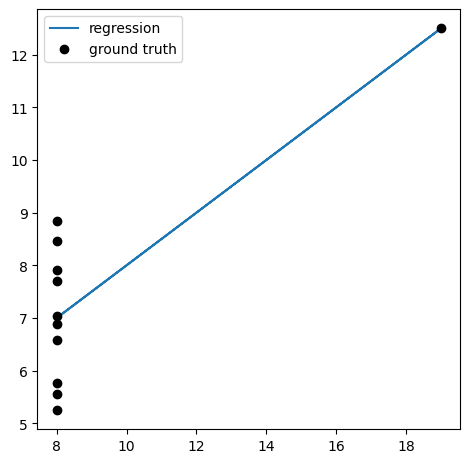

In [23]:
for i in range(4):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(2, 2, i + 1)

    intercept = results[0, i]
    slope = results[1, i]

    xi = x.iloc[:, i]
    yi = y.iloc[:, i]

    ax.plot(xi, xi * slope + intercept, label='regression')
    ax.plot(xi, yi, 'ok', label='ground truth')

    ax.legend(loc='best')

plt.show()

### Exercise 1.2

In [36]:
clocks = pd.read_csv('./../Data/antique_clocks.csv')
clocks.head()

,Unnamed: 0,age,price
0,1,108,729
1,2,108,1055
2,3,111,785
3,4,111,1175
4,5,113,946


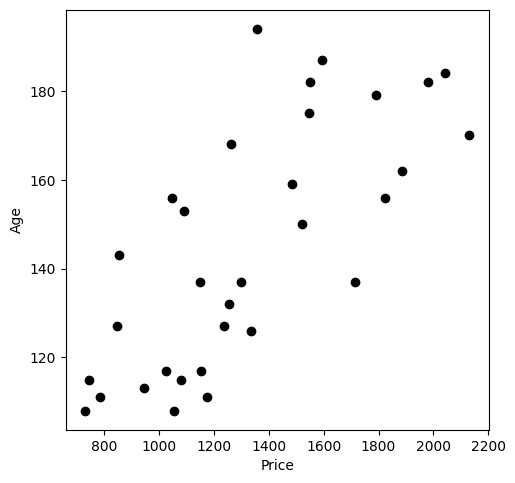

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(clocks.price, clocks.age, 'ok')
ax.set_xlabel('Price')
ax.set_ylabel('Age')
plt.show()

In [26]:
x_set = sm.add_constant(clocks.price)
y = clocks.age

model = sm.OLS(y, x_set).fit()
model.params

const    77.403660
price     0.050886
dtype: float64

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     34.27
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.10e-06
Time:                        20:10:24   Log-Likelihood:                -138.64
No. Observations:                  32   AIC:                             281.3
Df Residuals:                      30   BIC:                             284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4037     12.016      6.442      0.000      52.864     101.944
price          0.0509      0.009      5.854      0.000       0.033       0.069
==============================================================================
Omnibus:                        2.513   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.239
Skew:                           0.616   Prob(JB):                        0.326
Kurtosis:                       2.600   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

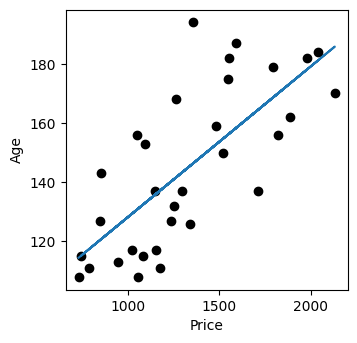

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 2, 1)

ax.plot(clocks.price, clocks.age, 'ok')
ax.plot(clocks.price, clocks.price * model.params.iloc[1] + model.params.iloc[0])

ax.set_xlabel('Price')
ax.set_ylabel('Age')
plt.show()

Even though the line seem to be placed correctly, there is a lot of variance. That said, it doesn't seem to be a good idea to use a linear model to describe the relationship between the age and the price of a clock.

### Exercise 1.3

In [29]:
windmill = pd.read_csv('./../Data/windmill.csv')
windmill.head()

,wind_speed,current
0,11.187073,1.582
1,13.424487,1.822
2,7.607209,1.057
3,6.041019,0.500
4,22.374145,2.236


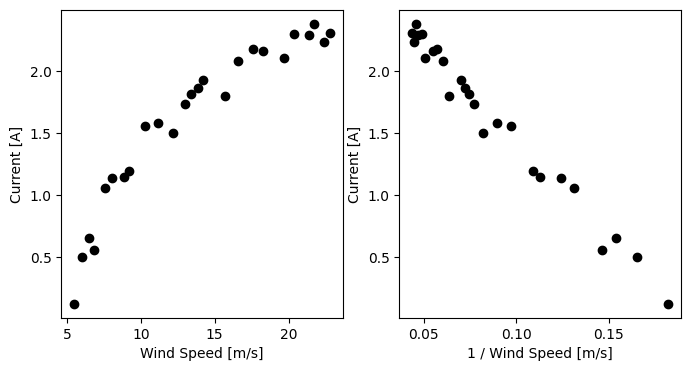

In [30]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
ax.plot(windmill.wind_speed, windmill.current, 'ok')
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

ax = fig.add_subplot(1, 2, 2)
ax.plot(1. / windmill.wind_speed, windmill.current, 'ok')
ax.set_xlabel('1 / Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

plt.show()

The relationship of current vs. 1 / wind-speed is pretty much the inversion of current vs wind-speed.

In [31]:
x_set = sm.add_constant(1 / windmill.wind_speed)

model = sm.OLS(windmill.current, x_set).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                current   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           4.74e-21
Time:                        20:10:24   Log-Likelihood:                 24.635
No. Observations:                  25   AIC:                            -45.27
Df Residuals:                      23   BIC:                            -42.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9789      0.045     66.341      0.000       2.886       3.072
wind_speed   -15.5155      0.462    -33.592      0.000     -16.471     -14.560
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.287
Skew:                          -0.720   Prob(JB):                        0.319
Kurtosis:                       2.646   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.params

const          2.978860
wind_speed   -15.515457
dtype: float64

In [33]:
model.conf_int(alpha = 0.01)

,0,1
const,2.852804,3.104916
wind_speed,-16.812102,-14.218812


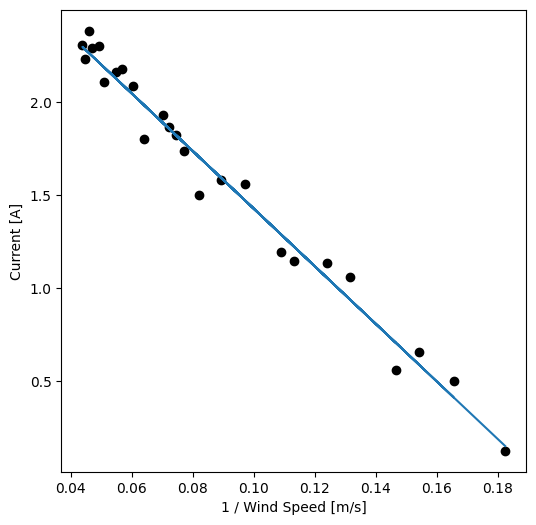

In [34]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(1. / windmill.wind_speed, windmill.current, 'ok')
ax.plot(1. / windmill.wind_speed, 1 / windmill.wind_speed * model.params.iloc[1] + model.params.iloc[0])
ax.set_xlabel('1 / Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

plt.show()

In [35]:
x0 = [1/1,1/10]
x0 = sm.add_constant(x0)

model.get_prediction(x0).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-12.536597,0.421537,-13.408613,-11.664581,-13.430108,-11.643086
1,1.427314,0.019600,1.386768,1.467861,1.228331,1.626298
